In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/agri.csv')

# Ensure 'Profit' column exists if do this
if 'Profit' not in df.columns:
    df['Profit'] = (df['pH'] * 10 + df['Nitrogen'] * 5 + df['Phosphorus'] * 3 + df['Potassium'] * 2 + df['Temperature'] * 2 + df['Rainfall'] * 0.5) / 6

# Separate the features and the target variable for training
X = df[['pH', 'Potassium', 'Nitrogen', 'Phosphorus', 'Temperature', 'Rainfall']]
y = df['Soil_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df


,pH,Potassium,Nitrogen,Phosphorus,Soil_Type,Crop_Type,Temperature,Rainfall,Profit
0,6.5,120,20,15,Sandy,Wheat,18.5,900,156.166667
1,7.0,150,30,20,Loamy,Corn,22.0,1100,195.666667
2,5.5,110,25,18,Clay,Rice,25.5,1400,200.833333
3,6.8,140,22,17,Silty,Barley,19.8,1000,174.766667
4,7.2,160,28,25,Peaty,Soybean,21.5,1200,208.333333
...,...,...,...,...,...,...,...,...,...
164,6.1,160,17,26,Loam,Wheat,20.0,850,168.166667
165,7.3,135,16,24,Silt,Lettuce,25.0,750,153.333333
166,4.7,95,8,14,Peat,Cranberry,15.0,1150,154.000000
167,8.0,175,17,26,Chalk,Lentil,19.0,650,159.333333


In [ ]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

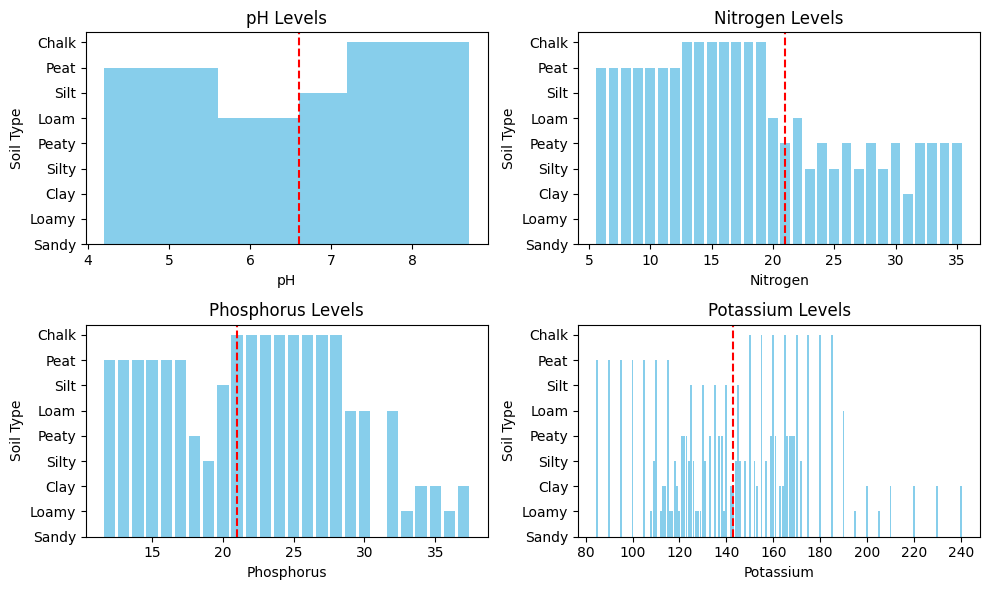

In [ ]:
pH_level = df['pH'].median()
Nitrogen_level = df['Nitrogen'].median()
Phosphorus_level = df['Phosphorus'].median()
Potassium_level = df['Potassium'].median()

user_levels = [pH_level,Nitrogen_level, Phosphorus_level, Potassium_level]
levels = ['pH', 'Nitrogen', 'Phosphorus', 'Potassium']

plt.figure(figsize=(10, 6))
for i in range(len(levels)):
    plt.subplot(2, 2, i+1)
    plt.bar(df[levels[i]], df['Soil_Type'], color='skyblue')
    plt.axvline(x=user_levels[i], color='red', linestyle='--')
    plt.xlabel(levels[i])
    plt.ylabel('Soil Type')
    plt.title(f'{levels[i]} Levels')
#plotting the graph
plt.tight_layout()
plt.show()

In [ ]:
def assess_soil_quality(ph_level, nitrogen_level, phosphorus_level, potassium_level, temperature, rainfall):
    quality = ""
    health = ""

    # Check pH level
    if 6.5 <= ph_level <= 7.5:
        quality += "Optimal pH level. "
    elif ph_level < 6.5:
        quality += "Low pH level. "
    else:
        quality += "High pH level. "

    # Check nitrogen level
    if nitrogen_level >= 20:
        quality += "High nitrogen level. "
    elif 10 <= nitrogen_level < 20:
        quality += "Moderate nitrogen level. "
    else:
        quality += "Low nitrogen level. "

    # Check phosphorus level
    if phosphorus_level >= 25:
        quality += "High phosphorus level. "
    elif 10 <= phosphorus_level < 25:
        quality += "Moderate phosphorus level. "
    else:
        quality += "Low phosphorus level. "

    # Check potassium level
    if potassium_level >= 200:
        quality += "High potassium level. "
    elif 100 <= potassium_level < 200:
        quality += "Moderate potassium level. "
    else:
        quality += "Low potassium level. "

    # Assess temperature
    if 20 <= temperature <= 30:
        quality += "Optimal temperature. "
    elif temperature < 20:
        quality += "Low temperature. "
    else:
        quality += "High temperature. "

    # Assess rainfall
    if 700 <= rainfall <= 900:
        quality += "Optimal rainfall. "
    elif rainfall < 700:
        quality += "Low rainfall. "
    else:
        quality += "High rainfall. "

    # Assess soil health
    if 'Low' in quality:
        health = "Poor"
    elif 'Moderate' in quality:
        health = "Fair"
    else:
        health = "Good"

    return quality.strip(), health.strip()

def suggest_crops(soil_type, ph_level, potassium_level, phosphorus_level, temperature, rainfall):
    # Filter the dataset for the given soil type
    filtered_df = df[df['Soil_Type'] == soil_type].copy()
    if filtered_df.empty:
        return pd.DataFrame()

    # Calculate a suitability score for each crop
    filtered_df.loc[:, 'Suitability_Score'] = (
        (filtered_df['pH'] - ph_level).abs() +
        (filtered_df['Potassium'] - potassium_level).abs() +
        (filtered_df['Phosphorus'] - phosphorus_level).abs() +
        (filtered_df['Temperature'] - temperature).abs() +
        (filtered_df['Rainfall'] - rainfall).abs()
    )

    # Sort crops by suitability score
    sorted_crops = filtered_df.sort_values(by='Suitability_Score')

    return sorted_crops[['Crop_Type', 'Suitability_Score', 'Profit']].head()

def list_crops_for_soil(soil_type):
    filtered_df = df[df['Soil_Type'] == soil_type]
    if filtered_df.empty:
        return []
    return filtered_df['Crop_Type'].unique().tolist()

def suggest_irrigation(health):
    if health == 'Poor':
        return 'Frequent irrigation required.'
    elif health == 'Fair':
        return 'Moderate irrigation required.'
    else:
        return 'Less irrigation required.'

# Example usage: Get user input
ph_level = float(input("Enter pH level of the soil: "))
potassium_level = float(input("Enter potassium level of the soil (in ppm): "))
nitrogen_level = float(input("Enter nitrogen level of the soil (in ppm): "))
phosphorus_level = float(input("Enter phosphorus level of the soil (in ppm): "))
temperature = float(input("Enter temperature (in °C): "))
rainfall = float(input("Enter rainfall (in mm): "))
soil_type = input("Enter the Soil Type(Sandy,Loamy,Clay,Silty,Peaty): ")

# Prepare the input for prediction
input_data = {
    'pH': ph_level,
    'Potassium': potassium_level,
    'Nitrogen': nitrogen_level,
    'Phosphorus': phosphorus_level,
    'Temperature': temperature,
    'Rainfall': rainfall
}
input_df = pd.DataFrame([input_data])

# Predict soil type based on user input
predicted_soil_type = clf.predict(input_df)[0]

# Assess soil quality
soil_quality, soil_health = assess_soil_quality(ph_level, nitrogen_level, phosphorus_level, potassium_level, temperature, rainfall)
print(f"Soil Quality Assessment: {soil_quality}")
print(f"Soil Health Assessment: {soil_health}")

# List crops for the given soil type
crops_for_soil = list_crops_for_soil(soil_type)
if crops_for_soil:
    print(f"Crops suitable for {soil_type} soil: {', '.join(crops_for_soil)}")

    # Suggest the most suitable crops for the given soil type
    suitable_crops = suggest_crops(soil_type, ph_level, potassium_level, phosphorus_level, temperature, rainfall)
    if not suitable_crops.empty:

        print("Top suggested crops:")
        for index, row in suitable_crops.iterrows():
            print(f"Crop: {row['Crop_Type']}, Suitability Score: {row['Suitability_Score']:.2f}")

        best_crop = suitable_crops.iloc[0]
        print(f"Suggested Crop: {best_crop['Crop_Type']}")
        print(f"Estimated Profit: ${best_crop['Profit']:.2f}")
    else:
        print(f"No suitable crop data available for {soil_type} soil.")
else:
    print(f"No crops found for {soil_type} soil.")

# Suggest irrigation based on soil health
irrigation = suggest_irrigation(soil_health)
print(f"Irrigation Recommendation: {irrigation}")

# Evaluate the model's accuracy (optional)
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Enter pH level of the soil: 6
Enter potassium level of the soil (in ppm): 120
Enter nitrogen level of the soil (in ppm): 20
Enter phosphorus level of the soil (in ppm): 16
Enter temperature (in °C): 17
Enter rainfall (in mm): 950
Enter the Soil Type: Sandy
Soil Quality Assessment: Low pH level. High nitrogen level. Moderate phosphorus level. Moderate potassium level. Low temperature. High rainfall.
Soil Health Assessment: Poor
Crops suitable for Sandy soil: Wheat, Potato, Cabbage, Spinach, Beetroot, Garlic, Celery, Sunflower, Broccoli, Cucumber, Onion, Brussel Sprouts, Peanut, Carrot
Top suggested crops:
Crop: Potato, Suitability Score: 10.00
Crop: Celery, Suitability Score: 10.50
Crop: Cucumber, Suitability Score: 11.70
Crop: Broccoli, Suitability Score: 20.60
Crop: Cabbage, Suitability Score: 43.20
Suggested Crop: Potato
Estimated Profit: $166.17
Irrigation Recommendation: Frequent irrigation required.
Model Accuracy: 64.71%
